In [13]:
#########################################
### Name : Md Ziauddin Ridoy ############
### Matriculation : 220100676 ####################


In [8]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
from itertools import product

In [33]:
def Rosenbrock_f(x,y):
    return (1 - x)**2 + 100*(y - x**2)**2

def Grad_Rosenbrock_f(x,y):
    g1 = -400*x*y + 400*x**3 + 2*x -2
    g2 = 200*y -200*x**2
    return np.array([g1,g2])

def Hessian_Rosenbrock_f(x,y):
    h11 = -400*y + 1200*x**2 + 2
    h12 = -400 * x
    h21 = -400 * x
    h22 = 200
    return np.array([[h11,h12],[h21,h22]])

    

In [9]:
def Rosenbrock(X):
    x, y = X 
    return (1 - x)**2 + 100*(y - x**2)**2

def Grad_Rosenbrock(X):
    x, y = X 
    return np.array([
       -400*x*y + 400*x**3 + 2*x -2,
        200*y -200*x**2     
    ])      

def Hessian_Rosenbrock(X):
    x, y = X 
    return np.matrix([
       [-400*y + 1200*x**2 + 2, -400*x],
        [-400*x, 200]         
    ])    
    

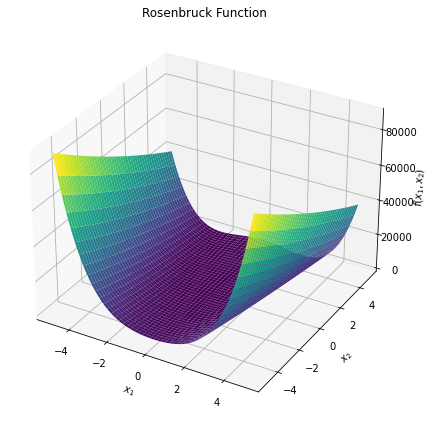

In [45]:
x = np.arange(-5, 5, 0.025)
y = np.arange(-5, 5, 0.025)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
mesh_size = range(len(X))
for i, j in product(mesh_size, mesh_size):
    x_coor = X[i][j]
    y_coor = Y[i][j]
    Z[i][j] = Rosenbrock(np.array([x_coor, y_coor]))

fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.set_title('Rosenbruck Function')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.tight_layout()
plt.show()

In [46]:
def ArmijoLineSearch(f, xk, pk, gfk, phi0, alpha0, rho=0.5, c1=1e-4):
    """Minimize over alpha, the function ``f(xₖ + αpₖ)``.
    α > 0 is assumed to be a descent direction.
    
    Parameters
    --------------------
    f : callable
        Function to be minimized.
    xk : array
        Current point.
    pk : array
        Search direction.
    gfk : array
        Gradient of `f` at point `xk`.
    phi0 : float
        Value of `f` at point `xk`.
    alpha0 : scalar
        Value of `alpha` at the start of the optimization.
    rho : float, optional
        Value of alpha shrinkage factor.
    c1 : float, optional
        Value to control stopping criterion.
    
    Returns
    --------------------
    alpha : scalar
        Value of `alpha` at the end of the optimization.
    phi : float
        Value of `f` at the new point `x_{k+1}`.
    """
    derphi0 = np.dot(gfk, pk)
    phi_a0 = f(xk + alpha0*pk)
    
    while not phi_a0 <= phi0 + c1*alpha0*derphi0:
        alpha0 = alpha0 * rho
        phi_a0 = f(xk + alpha0*pk)
    
    return alpha0, phi_a0

In [55]:
def GradientDescent(f, f_grad, init, alpha=1, tol=1e-3, max_iter=100000):
    """Gradient descent method for unconstraint optimization problem.
    given a starting point x ∈ Rⁿ,
    repeat
        1. Define direction. p := −∇f(x).
        2. Line search. Choose step length α using Armijo Line Search.
        3. Update. x := x + αp.
    until stopping criterion is satisfied.
    
    Parameters
    --------------------
    f : callable
        Function to be minimized.
    f_grad : callable
        The first derivative of f.
    init : array
        initial value of x.
    alpha : scalar, optional
        the initial value of steplength.
    tol : float, optional
        tolerance for the norm of f_grad.
    max_iter : integer, optional
        maximum number of steps.
    
    Returns
    --------------------
    xs : array
        x in the learning path
    ys : array
        f(x) in the learning path
    """
    # initialize x, f(x), and f'(x)
    xk = init    
    fk = f(xk)
    gfk = f_grad(xk)
    gfk_norm = np.linalg.norm(gfk)
    # initialize number of steps, save x and f(x)
    num_iter = 0
    curve_x = [xk]
    curve_y = [fk]
    print('Initial condition: y = {:.4f}, x = {} \n'.format(fk, xk))
    # take steps
    while gfk_norm > tol and num_iter < max_iter:
        # determine direction
        pk = -gfk
        #pk = np.linalg.inv(Hessian_Rosenbrock_f(x,y)) @ Grad_Rosenbrock_f(x,y)
        # calculate new x, f(x), and f'(x)
        alpha, fk = ArmijoLineSearch(f, xk, pk, gfk, fk, alpha0=alpha)
        xk = xk + alpha * pk
        gfk = f_grad(xk)
        gfk_norm = np.linalg.norm(gfk)
        # increase number of steps by 1, save new x and f(x)
        num_iter += 1
        curve_x.append(xk)
        curve_y.append(fk)
        print('Iteration: {} \t y = {:.4f}, x = {}, gradient = {:.4f}'.
              format(num_iter, fk, xk, gfk_norm))
    # print results
    if num_iter == max_iter:
        print('\nGradient descent does not converge.')
    else:
        print('\nSolution: \t y = {:.4f}, x = {}'.format(fk, xk))
    
    return np.array(curve_x), np.array(curve_y)

In [56]:
def plot(xs, ys):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    plt.suptitle('Gradient Descent Method')

    ax1.plot(xs[:,0], xs[:,1], linestyle='--', marker='o', color='orange')
    ax1.plot(xs[-1,0], xs[-1,1], 'ro')
    ax1.set(
        title='Path During Optimization Process',
        xlabel='x1',
        ylabel='x2'
    )
    CS = ax1.contour(X, Y, Z)
    ax1.clabel(CS, fontsize='smaller', fmt='%1.2f')
    ax1.axis('square')

    ax2.plot(ys, linestyle='--', marker='o', color='orange')
    ax2.plot(len(ys)-1, ys[-1], 'ro')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.set(
        title='Objective Function Value During Optimization Process',
        xlabel='Iterations',
        ylabel='Objective Function Value'
    )
    ax2.legend(['Armijo line search algorithm'])

    plt.tight_layout()
    plt.show()

Initial condition: y = 24.2000, x = [-1.2  1. ] 

Iteration: 1 	 y = 5.1011, x = [-0.98945313  1.0859375 ], gradient = 43.8985
Iteration: 2 	 y = 4.1194, x = [-1.02689261  1.06505468], gradient = 2.1275
Iteration: 3 	 y = 4.1157, x = [-1.02716425  1.06299487], gradient = 1.7746
Iteration: 4 	 y = 4.1126, x = [-1.02638613  1.06144634], gradient = 1.7749
Iteration: 5 	 y = 4.1095, x = [-1.02562692  1.05988817], gradient = 1.7753
Iteration: 6 	 y = 4.1065, x = [-1.02486672  1.05833005], gradient = 1.7757
Iteration: 7 	 y = 4.1034, x = [-1.0241059   1.05677179], gradient = 1.7761
Iteration: 8 	 y = 4.1003, x = [-1.02334446  1.05521342], gradient = 1.7765
Iteration: 9 	 y = 4.0972, x = [-1.02258239  1.05365491], gradient = 1.7769
Iteration: 10 	 y = 4.0941, x = [-1.02181968  1.05209629], gradient = 1.7773
Iteration: 11 	 y = 4.0910, x = [-1.02105635  1.05053753], gradient = 1.7777
Iteration: 12 	 y = 4.0880, x = [-1.02029238  1.04897865], gradient = 1.7781
Iteration: 13 	 y = 4.0849, x = [-

Iteration: 401 	 y = 2.7460, x = [-0.65519276  0.43726096], gradient = 2.0083
Iteration: 402 	 y = 2.7421, x = [-0.65400319  0.4357017 ], gradient = 2.0091
Iteration: 403 	 y = 2.7382, x = [-0.65281176  0.43414281], gradient = 2.0100
Iteration: 404 	 y = 2.7342, x = [-0.65161845  0.43258429], gradient = 2.0109
Iteration: 405 	 y = 2.7303, x = [-0.65042326  0.43102615], gradient = 2.0117
Iteration: 406 	 y = 2.7263, x = [-0.64922618  0.42946839], gradient = 2.0126
Iteration: 407 	 y = 2.7223, x = [-0.64802722  0.42791102], gradient = 2.0135
Iteration: 408 	 y = 2.7184, x = [-0.64682634  0.42635404], gradient = 2.0143
Iteration: 409 	 y = 2.7144, x = [-0.64562357  0.42479745], gradient = 2.0152
Iteration: 410 	 y = 2.7105, x = [-0.64441888  0.42324127], gradient = 2.0161
Iteration: 411 	 y = 2.7065, x = [-0.64321226  0.42168549], gradient = 2.0170
Iteration: 412 	 y = 2.7025, x = [-0.64200373  0.42013012], gradient = 2.0179
Iteration: 413 	 y = 2.6985, x = [-0.64079325  0.41857517], grad

Iteration: 767 	 y = 1.0943, x = [-0.04602366  0.00327203], gradient = 2.0836
Iteration: 768 	 y = 1.0901, x = [-0.04400139  0.00304667], gradient = 2.0803
Iteration: 769 	 y = 1.0858, x = [-0.04198141  0.00282976], gradient = 2.0770
Iteration: 770 	 y = 1.0816, x = [-0.03996379  0.0026213 ], gradient = 2.0737
Iteration: 771 	 y = 1.0774, x = [-0.0379486   0.00242126], gradient = 2.0703
Iteration: 772 	 y = 1.0733, x = [-0.0359359   0.00222963], gradient = 2.0669
Iteration: 773 	 y = 1.0691, x = [-0.03392576  0.00204638], gradient = 2.0635
Iteration: 774 	 y = 1.0649, x = [-0.03191824  0.00187149], gradient = 2.0600
Iteration: 775 	 y = 1.0608, x = [-0.02991341  0.00170495], gradient = 2.0565
Iteration: 776 	 y = 1.0567, x = [-0.02791132  0.00154672], gradient = 2.0530
Iteration: 777 	 y = 1.0525, x = [-0.02591206  0.00139678], gradient = 2.0494
Iteration: 778 	 y = 1.0484, x = [-0.02391566  0.00125511], gradient = 2.0459
Iteration: 779 	 y = 1.0444, x = [-0.02192221  0.00112168], grad

Iteration: 1156 	 y = 0.3275, x = [0.42839274 0.1806874 ], gradient = 0.8681
Iteration: 1157 	 y = 0.3268, x = [0.4290351  0.18124071], gradient = 0.8666
Iteration: 1158 	 y = 0.3261, x = [0.42967591 0.18179352], gradient = 0.8651
Iteration: 1159 	 y = 0.3253, x = [0.43031519 0.18234584], gradient = 0.8636
Iteration: 1160 	 y = 0.3246, x = [0.43095294 0.18289766], gradient = 0.8621
Iteration: 1161 	 y = 0.3239, x = [0.43158917 0.18344898], gradient = 0.8606
Iteration: 1162 	 y = 0.3232, x = [0.43222389 0.18399981], gradient = 0.8591
Iteration: 1163 	 y = 0.3224, x = [0.4328571  0.18455014], gradient = 0.8576
Iteration: 1164 	 y = 0.3217, x = [0.4334888  0.18509997], gradient = 0.8561
Iteration: 1165 	 y = 0.3210, x = [0.43411901 0.1856493 ], gradient = 0.8546
Iteration: 1166 	 y = 0.3203, x = [0.43474773 0.18619813], gradient = 0.8531
Iteration: 1167 	 y = 0.3196, x = [0.43537497 0.18674646], gradient = 0.8516
Iteration: 1168 	 y = 0.3189, x = [0.43600073 0.18729429], gradient = 0.8502

Iteration: 1534 	 y = 0.1615, x = [0.59858122 0.35632049], gradient = 0.5147
Iteration: 1535 	 y = 0.1613, x = [0.59890251 0.35670701], gradient = 0.5141
Iteration: 1536 	 y = 0.1610, x = [0.59922335 0.35709318], gradient = 0.5135
Iteration: 1537 	 y = 0.1608, x = [0.59954372 0.35747901], gradient = 0.5130
Iteration: 1538 	 y = 0.1605, x = [0.59986364 0.35786449], gradient = 0.5124
Iteration: 1539 	 y = 0.1602, x = [0.6001831  0.35824963], gradient = 0.5118
Iteration: 1540 	 y = 0.1600, x = [0.6005021  0.35863442], gradient = 0.5113
Iteration: 1541 	 y = 0.1597, x = [0.60082065 0.35901886], gradient = 0.5107
Iteration: 1542 	 y = 0.1595, x = [0.60113875 0.35940296], gradient = 0.5101
Iteration: 1543 	 y = 0.1592, x = [0.60145639 0.35978672], gradient = 0.5096
Iteration: 1544 	 y = 0.1590, x = [0.60177358 0.36017013], gradient = 0.5090
Iteration: 1545 	 y = 0.1587, x = [0.60209033 0.3605532 ], gradient = 0.5084
Iteration: 1546 	 y = 0.1585, x = [0.60240662 0.36093593], gradient = 0.5079

Iteration: 1889 	 y = 0.0963, x = [0.69010325 0.47476806], gradient = 0.3636
Iteration: 1890 	 y = 0.0961, x = [0.69031105 0.47505603], gradient = 0.3633
Iteration: 1891 	 y = 0.0960, x = [0.69051863 0.47534379], gradient = 0.3630
Iteration: 1892 	 y = 0.0959, x = [0.69072599 0.47563133], gradient = 0.3627
Iteration: 1893 	 y = 0.0957, x = [0.69093312 0.47591864], gradient = 0.3624
Iteration: 1894 	 y = 0.0956, x = [0.69114004 0.47620574], gradient = 0.3621
Iteration: 1895 	 y = 0.0955, x = [0.69134674 0.47649262], gradient = 0.3618
Iteration: 1896 	 y = 0.0954, x = [0.69155321 0.47677928], gradient = 0.3614
Iteration: 1897 	 y = 0.0952, x = [0.69175947 0.47706572], gradient = 0.3611
Iteration: 1898 	 y = 0.0951, x = [0.69196551 0.47735194], gradient = 0.3608
Iteration: 1899 	 y = 0.0950, x = [0.69217134 0.47763794], gradient = 0.3605
Iteration: 1900 	 y = 0.0948, x = [0.69237694 0.47792373], gradient = 0.3602
Iteration: 1901 	 y = 0.0947, x = [0.69258233 0.47820929], gradient = 0.3599

Iteration: 2241 	 y = 0.0617, x = [0.75185726 0.56414391], gradient = 0.2748
Iteration: 2242 	 y = 0.0616, x = [0.75200551 0.56436763], gradient = 0.2746
Iteration: 2243 	 y = 0.0616, x = [0.75215363 0.5645912 ], gradient = 0.2744
Iteration: 2244 	 y = 0.0615, x = [0.75230162 0.56481461], gradient = 0.2742
Iteration: 2245 	 y = 0.0614, x = [0.75244948 0.56503788], gradient = 0.2740
Iteration: 2246 	 y = 0.0613, x = [0.75259721 0.56526099], gradient = 0.2738
Iteration: 2247 	 y = 0.0613, x = [0.75274482 0.56548395], gradient = 0.2736
Iteration: 2248 	 y = 0.0612, x = [0.75289229 0.56570677], gradient = 0.2734
Iteration: 2249 	 y = 0.0611, x = [0.75303964 0.56592943], gradient = 0.2732
Iteration: 2250 	 y = 0.0610, x = [0.75318686 0.56615195], gradient = 0.2730
Iteration: 2251 	 y = 0.0610, x = [0.75333396 0.56637431], gradient = 0.2728
Iteration: 2252 	 y = 0.0609, x = [0.75348092 0.56659652], gradient = 0.2726
Iteration: 2253 	 y = 0.0608, x = [0.75362776 0.56681859], gradient = 0.2724

Iteration: 2527 	 y = 0.0444, x = [0.78959066 0.62250148], gradient = 0.2251
Iteration: 2528 	 y = 0.0443, x = [0.78970801 0.6226874 ], gradient = 0.2250
Iteration: 2529 	 y = 0.0443, x = [0.78982527 0.62287321], gradient = 0.2248
Iteration: 2530 	 y = 0.0442, x = [0.78994244 0.6230589 ], gradient = 0.2247
Iteration: 2531 	 y = 0.0442, x = [0.79005952 0.62324448], gradient = 0.2245
Iteration: 2532 	 y = 0.0441, x = [0.7901765  0.62342994], gradient = 0.2244
Iteration: 2533 	 y = 0.0441, x = [0.7902934  0.62361528], gradient = 0.2242
Iteration: 2534 	 y = 0.0440, x = [0.79041021 0.62380051], gradient = 0.2241
Iteration: 2535 	 y = 0.0440, x = [0.79052693 0.62398563], gradient = 0.2239
Iteration: 2536 	 y = 0.0439, x = [0.79064357 0.62417063], gradient = 0.2238
Iteration: 2537 	 y = 0.0439, x = [0.79076011 0.62435552], gradient = 0.2236
Iteration: 2538 	 y = 0.0438, x = [0.79087656 0.62454029], gradient = 0.2235
Iteration: 2539 	 y = 0.0438, x = [0.79099292 0.62472495], gradient = 0.2234

Iteration: 2664 	 y = 0.0382, x = [0.80486788 0.64693687], gradient = 0.2059
Iteration: 2665 	 y = 0.0381, x = [0.80497376 0.64710786], gradient = 0.2058
Iteration: 2666 	 y = 0.0381, x = [0.80507956 0.64727873], gradient = 0.2057
Iteration: 2667 	 y = 0.0380, x = [0.80518529 0.64744951], gradient = 0.2055
Iteration: 2668 	 y = 0.0380, x = [0.80529094 0.64762018], gradient = 0.2054
Iteration: 2669 	 y = 0.0379, x = [0.80539652 0.64779075], gradient = 0.2053
Iteration: 2670 	 y = 0.0379, x = [0.80550201 0.64796122], gradient = 0.2052
Iteration: 2671 	 y = 0.0379, x = [0.80560743 0.64813159], gradient = 0.2050
Iteration: 2672 	 y = 0.0378, x = [0.80571277 0.64830185], gradient = 0.2049
Iteration: 2673 	 y = 0.0378, x = [0.80581804 0.64847201], gradient = 0.2048
Iteration: 2674 	 y = 0.0377, x = [0.80592323 0.64864207], gradient = 0.2046
Iteration: 2675 	 y = 0.0377, x = [0.80602834 0.64881203], gradient = 0.2045
Iteration: 2676 	 y = 0.0377, x = [0.80613338 0.64898188], gradient = 0.2044

Iteration: 3064 	 y = 0.0251, x = [0.84180307 0.7079373 ], gradient = 0.1616
Iteration: 3065 	 y = 0.0250, x = [0.84188347 0.70807306], gradient = 0.1615
Iteration: 3066 	 y = 0.0250, x = [0.84196383 0.70820875], gradient = 0.1614
Iteration: 3067 	 y = 0.0250, x = [0.84204413 0.70834436], gradient = 0.1613
Iteration: 3068 	 y = 0.0250, x = [0.84212438 0.7084799 ], gradient = 0.1612
Iteration: 3069 	 y = 0.0249, x = [0.84220458 0.70861536], gradient = 0.1611
Iteration: 3070 	 y = 0.0249, x = [0.84228472 0.70875075], gradient = 0.1610
Iteration: 3071 	 y = 0.0249, x = [0.84236481 0.70888606], gradient = 0.1609
Iteration: 3072 	 y = 0.0249, x = [0.84244486 0.7090213 ], gradient = 0.1608
Iteration: 3073 	 y = 0.0248, x = [0.84252485 0.70915646], gradient = 0.1607
Iteration: 3074 	 y = 0.0248, x = [0.84260478 0.70929155], gradient = 0.1606
Iteration: 3075 	 y = 0.0248, x = [0.84268467 0.70942657], gradient = 0.1605
Iteration: 3076 	 y = 0.0248, x = [0.8427645 0.7095615], gradient = 0.1605
I

Iteration: 3495 	 y = 0.0164, x = [0.87217553 0.76013826], gradient = 0.1271
Iteration: 3496 	 y = 0.0164, x = [0.87223716 0.76024606], gradient = 0.1271
Iteration: 3497 	 y = 0.0163, x = [0.87229876 0.76035379], gradient = 0.1270
Iteration: 3498 	 y = 0.0163, x = [0.87236031 0.76046147], gradient = 0.1269
Iteration: 3499 	 y = 0.0163, x = [0.87242183 0.7605691 ], gradient = 0.1269
Iteration: 3500 	 y = 0.0163, x = [0.87248332 0.76067667], gradient = 0.1268
Iteration: 3501 	 y = 0.0163, x = [0.87254477 0.76078418], gradient = 0.1267
Iteration: 3502 	 y = 0.0163, x = [0.87260618 0.76089164], gradient = 0.1267
Iteration: 3503 	 y = 0.0162, x = [0.87266755 0.76099904], gradient = 0.1266
Iteration: 3504 	 y = 0.0162, x = [0.87272889 0.76110639], gradient = 0.1265
Iteration: 3505 	 y = 0.0162, x = [0.8727902  0.76121368], gradient = 0.1265
Iteration: 3506 	 y = 0.0162, x = [0.87285147 0.76132092], gradient = 0.1264
Iteration: 3507 	 y = 0.0162, x = [0.8729127 0.7614281], gradient = 0.1263
I

Iteration: 3789 	 y = 0.0124, x = [0.88884406 0.78956849], gradient = 0.1090
Iteration: 3790 	 y = 0.0124, x = [0.88889614 0.78966132], gradient = 0.1089
Iteration: 3791 	 y = 0.0124, x = [0.8889482 0.7897541], gradient = 0.1089
Iteration: 3792 	 y = 0.0123, x = [0.88900022 0.78984683], gradient = 0.1088
Iteration: 3793 	 y = 0.0123, x = [0.88905222 0.78993952], gradient = 0.1088
Iteration: 3794 	 y = 0.0123, x = [0.88910419 0.79003216], gradient = 0.1087
Iteration: 3795 	 y = 0.0123, x = [0.88915613 0.79012476], gradient = 0.1087
Iteration: 3796 	 y = 0.0123, x = [0.88920803 0.79021731], gradient = 0.1086
Iteration: 3797 	 y = 0.0123, x = [0.88925991 0.79030981], gradient = 0.1085
Iteration: 3798 	 y = 0.0123, x = [0.88931177 0.79040227], gradient = 0.1085
Iteration: 3799 	 y = 0.0123, x = [0.88936359 0.79049468], gradient = 0.1084
Iteration: 3800 	 y = 0.0123, x = [0.88941538 0.79058705], gradient = 0.1084
Iteration: 3801 	 y = 0.0122, x = [0.88946715 0.79067937], gradient = 0.1083
I

Iteration: 4180 	 y = 0.0086, x = [0.90718542 0.8225928 ], gradient = 0.0896
Iteration: 4181 	 y = 0.0086, x = [0.90722758 0.82266948], gradient = 0.0896
Iteration: 4182 	 y = 0.0086, x = [0.90726972 0.82274612], gradient = 0.0895
Iteration: 4183 	 y = 0.0086, x = [0.90731183 0.82282273], gradient = 0.0895
Iteration: 4184 	 y = 0.0086, x = [0.90735392 0.82289929], gradient = 0.0894
Iteration: 4185 	 y = 0.0086, x = [0.90739599 0.82297583], gradient = 0.0894
Iteration: 4186 	 y = 0.0086, x = [0.90743803 0.82305232], gradient = 0.0893
Iteration: 4187 	 y = 0.0086, x = [0.90748006 0.82312878], gradient = 0.0893
Iteration: 4188 	 y = 0.0086, x = [0.90752206 0.8232052 ], gradient = 0.0893
Iteration: 4189 	 y = 0.0086, x = [0.90756404 0.82328158], gradient = 0.0892
Iteration: 4190 	 y = 0.0086, x = [0.907606   0.82335793], gradient = 0.0892
Iteration: 4191 	 y = 0.0085, x = [0.90764793 0.82343424], gradient = 0.0891
Iteration: 4192 	 y = 0.0085, x = [0.90768985 0.82351052], gradient = 0.0891

Iteration: 4499 	 y = 0.0065, x = [0.91958358 0.8452963 ], gradient = 0.0768
Iteration: 4500 	 y = 0.0065, x = [0.91961935 0.84536225], gradient = 0.0768
Iteration: 4501 	 y = 0.0065, x = [0.9196551  0.84542816], gradient = 0.0768
Iteration: 4502 	 y = 0.0065, x = [0.91969084 0.84549405], gradient = 0.0767
Iteration: 4503 	 y = 0.0065, x = [0.91972656 0.84555991], gradient = 0.0767
Iteration: 4504 	 y = 0.0064, x = [0.91976226 0.84562574], gradient = 0.0766
Iteration: 4505 	 y = 0.0064, x = [0.91979794 0.84569153], gradient = 0.0766
Iteration: 4506 	 y = 0.0064, x = [0.9198336 0.8457573], gradient = 0.0766
Iteration: 4507 	 y = 0.0064, x = [0.91986925 0.84582303], gradient = 0.0765
Iteration: 4508 	 y = 0.0064, x = [0.91990488 0.84588873], gradient = 0.0765
Iteration: 4509 	 y = 0.0064, x = [0.91994049 0.84595441], gradient = 0.0765
Iteration: 4510 	 y = 0.0064, x = [0.91997608 0.84602005], gradient = 0.0764
Iteration: 4511 	 y = 0.0064, x = [0.92001165 0.84608566], gradient = 0.0764
I

Iteration: 4814 	 y = 0.0049, x = [0.93001314 0.86463238], gradient = 0.0663
Iteration: 4815 	 y = 0.0049, x = [0.93004373 0.86468942], gradient = 0.0663
Iteration: 4816 	 y = 0.0049, x = [0.93007431 0.86474644], gradient = 0.0662
Iteration: 4817 	 y = 0.0049, x = [0.93010488 0.86480343], gradient = 0.0662
Iteration: 4818 	 y = 0.0049, x = [0.93013543 0.86486039], gradient = 0.0662
Iteration: 4819 	 y = 0.0049, x = [0.93016596 0.86491733], gradient = 0.0661
Iteration: 4820 	 y = 0.0049, x = [0.93019648 0.86497424], gradient = 0.0661
Iteration: 4821 	 y = 0.0049, x = [0.93022699 0.86503113], gradient = 0.0661
Iteration: 4822 	 y = 0.0049, x = [0.93025748 0.86508799], gradient = 0.0660
Iteration: 4823 	 y = 0.0049, x = [0.93028795 0.86514482], gradient = 0.0660
Iteration: 4824 	 y = 0.0049, x = [0.93031841 0.86520163], gradient = 0.0660
Iteration: 4825 	 y = 0.0049, x = [0.93034886 0.86525841], gradient = 0.0659
Iteration: 4826 	 y = 0.0049, x = [0.93037929 0.86531517], gradient = 0.0659

Iteration: 5147 	 y = 0.0037, x = [0.93942611 0.88227005], gradient = 0.0569
Iteration: 5148 	 y = 0.0037, x = [0.93945218 0.88231915], gradient = 0.0569
Iteration: 5149 	 y = 0.0037, x = [0.93947823 0.88236822], gradient = 0.0569
Iteration: 5150 	 y = 0.0037, x = [0.93950428 0.88241727], gradient = 0.0568
Iteration: 5151 	 y = 0.0037, x = [0.93953031 0.88246629], gradient = 0.0568
Iteration: 5152 	 y = 0.0037, x = [0.93955633 0.8825153 ], gradient = 0.0568
Iteration: 5153 	 y = 0.0037, x = [0.93958234 0.88256428], gradient = 0.0568
Iteration: 5154 	 y = 0.0037, x = [0.93960833 0.88261325], gradient = 0.0567
Iteration: 5155 	 y = 0.0037, x = [0.93963432 0.88266219], gradient = 0.0567
Iteration: 5156 	 y = 0.0036, x = [0.93966029 0.8827111 ], gradient = 0.0567
Iteration: 5157 	 y = 0.0036, x = [0.93968625 0.88276   ], gradient = 0.0567
Iteration: 5158 	 y = 0.0036, x = [0.93971219 0.88280888], gradient = 0.0566
Iteration: 5159 	 y = 0.0036, x = [0.93973813 0.88285773], gradient = 0.0566

Iteration: 5372 	 y = 0.0030, x = [0.94499305 0.89278436], gradient = 0.0515
Iteration: 5373 	 y = 0.0030, x = [0.9450165  0.89282879], gradient = 0.0514
Iteration: 5374 	 y = 0.0030, x = [0.94503995 0.8928732 ], gradient = 0.0514
Iteration: 5375 	 y = 0.0030, x = [0.94506338 0.8929176 ], gradient = 0.0514
Iteration: 5376 	 y = 0.0030, x = [0.94508681 0.89296197], gradient = 0.0514
Iteration: 5377 	 y = 0.0030, x = [0.94511022 0.89300633], gradient = 0.0513
Iteration: 5378 	 y = 0.0030, x = [0.94513362 0.89305066], gradient = 0.0513
Iteration: 5379 	 y = 0.0030, x = [0.94515701 0.89309498], gradient = 0.0513
Iteration: 5380 	 y = 0.0030, x = [0.94518039 0.89313928], gradient = 0.0513
Iteration: 5381 	 y = 0.0030, x = [0.94520376 0.89318355], gradient = 0.0512
Iteration: 5382 	 y = 0.0030, x = [0.94522712 0.89322781], gradient = 0.0512
Iteration: 5383 	 y = 0.0030, x = [0.94525047 0.89327205], gradient = 0.0512
Iteration: 5384 	 y = 0.0030, x = [0.94527381 0.89331627], gradient = 0.0512

Iteration: 5774 	 y = 0.0022, x = [0.95360265 0.90916711], gradient = 0.0431
Iteration: 5775 	 y = 0.0022, x = [0.95362216 0.9092044 ], gradient = 0.0431
Iteration: 5776 	 y = 0.0022, x = [0.95364166 0.90924167], gradient = 0.0431
Iteration: 5777 	 y = 0.0022, x = [0.95366115 0.90927892], gradient = 0.0430
Iteration: 5778 	 y = 0.0021, x = [0.95368063 0.90931616], gradient = 0.0430
Iteration: 5779 	 y = 0.0021, x = [0.9537001  0.90935338], gradient = 0.0430
Iteration: 5780 	 y = 0.0021, x = [0.95371956 0.90939059], gradient = 0.0430
Iteration: 5781 	 y = 0.0021, x = [0.95373902 0.90942778], gradient = 0.0430
Iteration: 5782 	 y = 0.0021, x = [0.95375846 0.90946495], gradient = 0.0429
Iteration: 5783 	 y = 0.0021, x = [0.9537779  0.90950211], gradient = 0.0429
Iteration: 5784 	 y = 0.0021, x = [0.95379732 0.90953925], gradient = 0.0429
Iteration: 5785 	 y = 0.0021, x = [0.95381674 0.90957638], gradient = 0.0429
Iteration: 5786 	 y = 0.0021, x = [0.95383615 0.90961349], gradient = 0.0429

Iteration: 6043 	 y = 0.0017, x = [0.95854587 0.91864012], gradient = 0.0383
Iteration: 6044 	 y = 0.0017, x = [0.95856315 0.91867333], gradient = 0.0383
Iteration: 6045 	 y = 0.0017, x = [0.95858043 0.91870653], gradient = 0.0383
Iteration: 6046 	 y = 0.0017, x = [0.95859771 0.91873972], gradient = 0.0383
Iteration: 6047 	 y = 0.0017, x = [0.95861497 0.91877289], gradient = 0.0383
Iteration: 6048 	 y = 0.0017, x = [0.95863223 0.91880605], gradient = 0.0383
Iteration: 6049 	 y = 0.0017, x = [0.95864948 0.9188392 ], gradient = 0.0382
Iteration: 6050 	 y = 0.0017, x = [0.95866672 0.91887233], gradient = 0.0382
Iteration: 6051 	 y = 0.0017, x = [0.95868395 0.91890544], gradient = 0.0382
Iteration: 6052 	 y = 0.0017, x = [0.95870118 0.91893854], gradient = 0.0382
Iteration: 6053 	 y = 0.0017, x = [0.9587184  0.91897163], gradient = 0.0382
Iteration: 6054 	 y = 0.0017, x = [0.95873561 0.91900471], gradient = 0.0382
Iteration: 6055 	 y = 0.0017, x = [0.95875281 0.91903777], gradient = 0.0381

Iteration: 6445 	 y = 0.0012, x = [0.96491418 0.93091598], gradient = 0.0323
Iteration: 6446 	 y = 0.0012, x = [0.96492866 0.93094398], gradient = 0.0323
Iteration: 6447 	 y = 0.0012, x = [0.96494313 0.93097198], gradient = 0.0323
Iteration: 6448 	 y = 0.0012, x = [0.9649576  0.93099996], gradient = 0.0322
Iteration: 6449 	 y = 0.0012, x = [0.96497206 0.93102793], gradient = 0.0322
Iteration: 6450 	 y = 0.0012, x = [0.96498652 0.93105589], gradient = 0.0322
Iteration: 6451 	 y = 0.0012, x = [0.96500097 0.93108384], gradient = 0.0322
Iteration: 6452 	 y = 0.0012, x = [0.96501541 0.93111177], gradient = 0.0322
Iteration: 6453 	 y = 0.0012, x = [0.96502984 0.93113969], gradient = 0.0322
Iteration: 6454 	 y = 0.0012, x = [0.96504427 0.93116761], gradient = 0.0322
Iteration: 6455 	 y = 0.0012, x = [0.9650587  0.93119551], gradient = 0.0321
Iteration: 6456 	 y = 0.0012, x = [0.96507312 0.93122339], gradient = 0.0321
Iteration: 6457 	 y = 0.0012, x = [0.96508753 0.93125127], gradient = 0.0321

Iteration: 6835 	 y = 0.0009, x = [0.97011072 0.94099303], gradient = 0.0274
Iteration: 6836 	 y = 0.0009, x = [0.97012295 0.94101682], gradient = 0.0274
Iteration: 6837 	 y = 0.0009, x = [0.97013518 0.94104059], gradient = 0.0274
Iteration: 6838 	 y = 0.0009, x = [0.9701474  0.94106436], gradient = 0.0274
Iteration: 6839 	 y = 0.0009, x = [0.97015962 0.94108811], gradient = 0.0273
Iteration: 6840 	 y = 0.0009, x = [0.97017183 0.94111185], gradient = 0.0273
Iteration: 6841 	 y = 0.0009, x = [0.97018403 0.94113559], gradient = 0.0273
Iteration: 6842 	 y = 0.0009, x = [0.97019623 0.94115931], gradient = 0.0273
Iteration: 6843 	 y = 0.0009, x = [0.97020843 0.94118303], gradient = 0.0273
Iteration: 6844 	 y = 0.0009, x = [0.97022062 0.94120673], gradient = 0.0273
Iteration: 6845 	 y = 0.0009, x = [0.9702328  0.94123043], gradient = 0.0273
Iteration: 6846 	 y = 0.0009, x = [0.97024498 0.94125411], gradient = 0.0273
Iteration: 6847 	 y = 0.0009, x = [0.97025716 0.94127778], gradient = 0.0272

Iteration: 7212 	 y = 0.0007, x = [0.97437088 0.94929446], gradient = 0.0234
Iteration: 7213 	 y = 0.0007, x = [0.97438129 0.9493148 ], gradient = 0.0234
Iteration: 7214 	 y = 0.0007, x = [0.97439171 0.94933513], gradient = 0.0234
Iteration: 7215 	 y = 0.0007, x = [0.97440211 0.94935546], gradient = 0.0234
Iteration: 7216 	 y = 0.0007, x = [0.97441252 0.94937577], gradient = 0.0234
Iteration: 7217 	 y = 0.0007, x = [0.97442291 0.94939608], gradient = 0.0234
Iteration: 7218 	 y = 0.0007, x = [0.97443331 0.94941638], gradient = 0.0233
Iteration: 7219 	 y = 0.0007, x = [0.9744437  0.94943667], gradient = 0.0233
Iteration: 7220 	 y = 0.0007, x = [0.97445408 0.94945695], gradient = 0.0233
Iteration: 7221 	 y = 0.0007, x = [0.97446446 0.94947723], gradient = 0.0233
Iteration: 7222 	 y = 0.0007, x = [0.97447484 0.9494975 ], gradient = 0.0233
Iteration: 7223 	 y = 0.0007, x = [0.97448521 0.94951775], gradient = 0.0233
Iteration: 7224 	 y = 0.0007, x = [0.97449558 0.949538  ], gradient = 0.0233

Iteration: 7548 	 y = 0.0005, x = [0.97763467 0.95567885], gradient = 0.0204
Iteration: 7549 	 y = 0.0005, x = [0.97764372 0.95569657], gradient = 0.0204
Iteration: 7550 	 y = 0.0005, x = [0.97765275 0.95571427], gradient = 0.0204
Iteration: 7551 	 y = 0.0005, x = [0.97766179 0.95573198], gradient = 0.0203
Iteration: 7552 	 y = 0.0005, x = [0.97767082 0.95574967], gradient = 0.0203
Iteration: 7553 	 y = 0.0005, x = [0.97767985 0.95576736], gradient = 0.0203
Iteration: 7554 	 y = 0.0005, x = [0.97768887 0.95578504], gradient = 0.0203
Iteration: 7555 	 y = 0.0005, x = [0.97769789 0.95580271], gradient = 0.0203
Iteration: 7556 	 y = 0.0005, x = [0.9777069  0.95582038], gradient = 0.0203
Iteration: 7557 	 y = 0.0005, x = [0.97771591 0.95583804], gradient = 0.0203
Iteration: 7558 	 y = 0.0005, x = [0.97772492 0.95585569], gradient = 0.0203
Iteration: 7559 	 y = 0.0005, x = [0.97773393 0.95587333], gradient = 0.0203
Iteration: 7560 	 y = 0.0005, x = [0.97774293 0.95589097], gradient = 0.0203

Iteration: 7883 	 y = 0.0004, x = [0.9804619  0.96122642], gradient = 0.0178
Iteration: 7884 	 y = 0.0004, x = [0.98046976 0.96124187], gradient = 0.0177
Iteration: 7885 	 y = 0.0004, x = [0.98047762 0.96125732], gradient = 0.0177
Iteration: 7886 	 y = 0.0004, x = [0.98048548 0.96127276], gradient = 0.0177
Iteration: 7887 	 y = 0.0004, x = [0.98049333 0.96128819], gradient = 0.0177
Iteration: 7888 	 y = 0.0004, x = [0.98050118 0.96130361], gradient = 0.0177
Iteration: 7889 	 y = 0.0004, x = [0.98050902 0.96131903], gradient = 0.0177
Iteration: 7890 	 y = 0.0004, x = [0.98051687 0.96133445], gradient = 0.0177
Iteration: 7891 	 y = 0.0004, x = [0.98052471 0.96134985], gradient = 0.0177
Iteration: 7892 	 y = 0.0004, x = [0.98053254 0.96136525], gradient = 0.0177
Iteration: 7893 	 y = 0.0004, x = [0.98054038 0.96138065], gradient = 0.0177
Iteration: 7894 	 y = 0.0004, x = [0.98054821 0.96139604], gradient = 0.0177
Iteration: 7895 	 y = 0.0004, x = [0.98055604 0.96141142], gradient = 0.0177

Iteration: 8125 	 y = 0.0003, x = [0.98227277 0.9647881 ], gradient = 0.0161
Iteration: 8126 	 y = 0.0003, x = [0.98227988 0.9648021 ], gradient = 0.0161
Iteration: 8127 	 y = 0.0003, x = [0.98228699 0.9648161 ], gradient = 0.0161
Iteration: 8128 	 y = 0.0003, x = [0.9822941  0.96483009], gradient = 0.0161
Iteration: 8129 	 y = 0.0003, x = [0.98230121 0.96484408], gradient = 0.0161
Iteration: 8130 	 y = 0.0003, x = [0.98230831 0.96485806], gradient = 0.0161
Iteration: 8131 	 y = 0.0003, x = [0.98231541 0.96487203], gradient = 0.0160
Iteration: 8132 	 y = 0.0003, x = [0.9823225 0.964886 ], gradient = 0.0160
Iteration: 8133 	 y = 0.0003, x = [0.98232959 0.96489997], gradient = 0.0160
Iteration: 8134 	 y = 0.0003, x = [0.98233668 0.96491392], gradient = 0.0160
Iteration: 8135 	 y = 0.0003, x = [0.98234377 0.96492788], gradient = 0.0160
Iteration: 8136 	 y = 0.0003, x = [0.98235085 0.96494182], gradient = 0.0160
Iteration: 8137 	 y = 0.0003, x = [0.98235794 0.96495576], gradient = 0.0160
I

Iteration: 8500 	 y = 0.0002, x = [0.98474502 0.96966115], gradient = 0.0138
Iteration: 8501 	 y = 0.0002, x = [0.98475112 0.96967318], gradient = 0.0138
Iteration: 8502 	 y = 0.0002, x = [0.98475721 0.96968521], gradient = 0.0138
Iteration: 8503 	 y = 0.0002, x = [0.9847633  0.96969723], gradient = 0.0138
Iteration: 8504 	 y = 0.0002, x = [0.98476939 0.96970925], gradient = 0.0138
Iteration: 8505 	 y = 0.0002, x = [0.98477548 0.96972126], gradient = 0.0138
Iteration: 8506 	 y = 0.0002, x = [0.98478156 0.96973327], gradient = 0.0138
Iteration: 8507 	 y = 0.0002, x = [0.98478765 0.96974528], gradient = 0.0138
Iteration: 8508 	 y = 0.0002, x = [0.98479373 0.96975727], gradient = 0.0138
Iteration: 8509 	 y = 0.0002, x = [0.9847998  0.96976927], gradient = 0.0138
Iteration: 8510 	 y = 0.0002, x = [0.98480588 0.96978126], gradient = 0.0138
Iteration: 8511 	 y = 0.0002, x = [0.98481195 0.96979324], gradient = 0.0138
Iteration: 8512 	 y = 0.0002, x = [0.98481802 0.96980522], gradient = 0.0137

Iteration: 8920 	 y = 0.0002, x = [0.98709854 0.97431151], gradient = 0.0117
Iteration: 8921 	 y = 0.0002, x = [0.98710368 0.97432167], gradient = 0.0117
Iteration: 8922 	 y = 0.0002, x = [0.98710882 0.97433183], gradient = 0.0117
Iteration: 8923 	 y = 0.0002, x = [0.98711395 0.97434198], gradient = 0.0116
Iteration: 8924 	 y = 0.0002, x = [0.98711908 0.97435213], gradient = 0.0116
Iteration: 8925 	 y = 0.0002, x = [0.98712421 0.97436228], gradient = 0.0116
Iteration: 8926 	 y = 0.0002, x = [0.98712933 0.97437242], gradient = 0.0116
Iteration: 8927 	 y = 0.0002, x = [0.98713446 0.97438255], gradient = 0.0116
Iteration: 8928 	 y = 0.0002, x = [0.98713958 0.97439269], gradient = 0.0116
Iteration: 8929 	 y = 0.0002, x = [0.9871447  0.97440282], gradient = 0.0116
Iteration: 8930 	 y = 0.0002, x = [0.98714982 0.97441294], gradient = 0.0116
Iteration: 8931 	 y = 0.0002, x = [0.98715493 0.97442306], gradient = 0.0116
Iteration: 8932 	 y = 0.0002, x = [0.98716005 0.97443318], gradient = 0.0116

Iteration: 9185 	 y = 0.0001, x = [0.98838938 0.97686678], gradient = 0.0105
Iteration: 9186 	 y = 0.0001, x = [0.98839399 0.97687592], gradient = 0.0105
Iteration: 9187 	 y = 0.0001, x = [0.9883986  0.97688505], gradient = 0.0105
Iteration: 9188 	 y = 0.0001, x = [0.98840321 0.97689418], gradient = 0.0105
Iteration: 9189 	 y = 0.0001, x = [0.98840782 0.97690331], gradient = 0.0105
Iteration: 9190 	 y = 0.0001, x = [0.98841243 0.97691243], gradient = 0.0105
Iteration: 9191 	 y = 0.0001, x = [0.98841703 0.97692155], gradient = 0.0105
Iteration: 9192 	 y = 0.0001, x = [0.98842163 0.97693067], gradient = 0.0105
Iteration: 9193 	 y = 0.0001, x = [0.98842623 0.97693978], gradient = 0.0104
Iteration: 9194 	 y = 0.0001, x = [0.98843083 0.97694889], gradient = 0.0104
Iteration: 9195 	 y = 0.0001, x = [0.98843543 0.976958  ], gradient = 0.0104
Iteration: 9196 	 y = 0.0001, x = [0.98844002 0.9769671 ], gradient = 0.0104
Iteration: 9197 	 y = 0.0001, x = [0.98844462 0.9769762 ], gradient = 0.0104

Iteration: 9506 	 y = 0.0001, x = [0.98977845 0.97962022], gradient = 0.0092
Iteration: 9507 	 y = 0.0001, x = [0.9897825  0.97962826], gradient = 0.0092
Iteration: 9508 	 y = 0.0001, x = [0.98978655 0.97963629], gradient = 0.0092
Iteration: 9509 	 y = 0.0001, x = [0.9897906  0.97964433], gradient = 0.0092
Iteration: 9510 	 y = 0.0001, x = [0.98979465 0.97965235], gradient = 0.0092
Iteration: 9511 	 y = 0.0001, x = [0.98979869 0.97966038], gradient = 0.0092
Iteration: 9512 	 y = 0.0001, x = [0.98980274 0.9796684 ], gradient = 0.0092
Iteration: 9513 	 y = 0.0001, x = [0.98980678 0.97967642], gradient = 0.0092
Iteration: 9514 	 y = 0.0001, x = [0.98981082 0.97968444], gradient = 0.0092
Iteration: 9515 	 y = 0.0001, x = [0.98981486 0.97969245], gradient = 0.0092
Iteration: 9516 	 y = 0.0001, x = [0.9898189  0.97970046], gradient = 0.0092
Iteration: 9517 	 y = 0.0001, x = [0.98982293 0.97970846], gradient = 0.0092
Iteration: 9518 	 y = 0.0001, x = [0.98982697 0.97971647], gradient = 0.0092

Iteration: 9837 	 y = 0.0001, x = [0.99103448 0.98211327], gradient = 0.0081
Iteration: 9838 	 y = 0.0001, x = [0.99103803 0.98212032], gradient = 0.0081
Iteration: 9839 	 y = 0.0001, x = [0.99104157 0.98212736], gradient = 0.0081
Iteration: 9840 	 y = 0.0001, x = [0.99104512 0.9821344 ], gradient = 0.0081
Iteration: 9841 	 y = 0.0001, x = [0.99104866 0.98214143], gradient = 0.0081
Iteration: 9842 	 y = 0.0001, x = [0.9910522  0.98214847], gradient = 0.0081
Iteration: 9843 	 y = 0.0001, x = [0.99105574 0.9821555 ], gradient = 0.0081
Iteration: 9844 	 y = 0.0001, x = [0.99105928 0.98216253], gradient = 0.0081
Iteration: 9845 	 y = 0.0001, x = [0.99106282 0.98216955], gradient = 0.0081
Iteration: 9846 	 y = 0.0001, x = [0.99106635 0.98217658], gradient = 0.0080
Iteration: 9847 	 y = 0.0001, x = [0.99106989 0.9821836 ], gradient = 0.0080
Iteration: 9848 	 y = 0.0001, x = [0.99107342 0.98219061], gradient = 0.0080
Iteration: 9849 	 y = 0.0001, x = [0.99107695 0.98219763], gradient = 0.0080

Iteration: 10181 	 y = 0.0001, x = [0.99217451 0.9843788 ], gradient = 0.0070
Iteration: 10182 	 y = 0.0001, x = [0.9921776  0.98438495], gradient = 0.0070
Iteration: 10183 	 y = 0.0001, x = [0.99218069 0.98439109], gradient = 0.0070
Iteration: 10184 	 y = 0.0001, x = [0.99218378 0.98439723], gradient = 0.0070
Iteration: 10185 	 y = 0.0001, x = [0.99218687 0.98440337], gradient = 0.0070
Iteration: 10186 	 y = 0.0001, x = [0.99218995 0.9844095 ], gradient = 0.0070
Iteration: 10187 	 y = 0.0001, x = [0.99219304 0.98441564], gradient = 0.0070
Iteration: 10188 	 y = 0.0001, x = [0.99219612 0.98442177], gradient = 0.0070
Iteration: 10189 	 y = 0.0001, x = [0.9921992  0.98442789], gradient = 0.0070
Iteration: 10190 	 y = 0.0001, x = [0.99220228 0.98443402], gradient = 0.0070
Iteration: 10191 	 y = 0.0001, x = [0.99220536 0.98444014], gradient = 0.0070
Iteration: 10192 	 y = 0.0001, x = [0.99220844 0.98444626], gradient = 0.0070
Iteration: 10193 	 y = 0.0001, x = [0.99221152 0.98445238], grad

Iteration: 10520 	 y = 0.0000, x = [0.99315451 0.98632838], gradient = 0.0062
Iteration: 10521 	 y = 0.0000, x = [0.99315721 0.98633375], gradient = 0.0062
Iteration: 10522 	 y = 0.0000, x = [0.99315991 0.98633912], gradient = 0.0062
Iteration: 10523 	 y = 0.0000, x = [0.9931626  0.98634449], gradient = 0.0061
Iteration: 10524 	 y = 0.0000, x = [0.9931653  0.98634985], gradient = 0.0061
Iteration: 10525 	 y = 0.0000, x = [0.993168   0.98635522], gradient = 0.0061
Iteration: 10526 	 y = 0.0000, x = [0.99317069 0.98636058], gradient = 0.0061
Iteration: 10527 	 y = 0.0000, x = [0.99317338 0.98636594], gradient = 0.0061
Iteration: 10528 	 y = 0.0000, x = [0.99317607 0.98637129], gradient = 0.0061
Iteration: 10529 	 y = 0.0000, x = [0.99317876 0.98637665], gradient = 0.0061
Iteration: 10530 	 y = 0.0000, x = [0.99318145 0.986382  ], gradient = 0.0061
Iteration: 10531 	 y = 0.0000, x = [0.99318414 0.98638735], gradient = 0.0061
Iteration: 10532 	 y = 0.0000, x = [0.99318683 0.9863927 ], grad

Iteration: 10861 	 y = 0.0000, x = [0.99401532 0.98804242], gradient = 0.0054
Iteration: 10862 	 y = 0.0000, x = [0.99401768 0.98804711], gradient = 0.0054
Iteration: 10863 	 y = 0.0000, x = [0.99402003 0.98805181], gradient = 0.0054
Iteration: 10864 	 y = 0.0000, x = [0.99402239 0.9880565 ], gradient = 0.0054
Iteration: 10865 	 y = 0.0000, x = [0.99402474 0.98806119], gradient = 0.0054
Iteration: 10866 	 y = 0.0000, x = [0.99402709 0.98806587], gradient = 0.0054
Iteration: 10867 	 y = 0.0000, x = [0.99402944 0.98807056], gradient = 0.0054
Iteration: 10868 	 y = 0.0000, x = [0.9940318  0.98807524], gradient = 0.0054
Iteration: 10869 	 y = 0.0000, x = [0.99403414 0.98807992], gradient = 0.0054
Iteration: 10870 	 y = 0.0000, x = [0.99403649 0.9880846 ], gradient = 0.0054
Iteration: 10871 	 y = 0.0000, x = [0.99403884 0.98808928], gradient = 0.0054
Iteration: 10872 	 y = 0.0000, x = [0.99404119 0.98809396], gradient = 0.0054
Iteration: 10873 	 y = 0.0000, x = [0.99404354 0.98809863], grad

Iteration: 11162 	 y = 0.0000, x = [0.99468398 0.98937488], gradient = 0.0048
Iteration: 11163 	 y = 0.0000, x = [0.99468607 0.98937905], gradient = 0.0048
Iteration: 11164 	 y = 0.0000, x = [0.99468816 0.98938322], gradient = 0.0048
Iteration: 11165 	 y = 0.0000, x = [0.99469025 0.98938738], gradient = 0.0048
Iteration: 11166 	 y = 0.0000, x = [0.99469234 0.98939154], gradient = 0.0048
Iteration: 11167 	 y = 0.0000, x = [0.99469443 0.98939571], gradient = 0.0048
Iteration: 11168 	 y = 0.0000, x = [0.99469651 0.98939987], gradient = 0.0048
Iteration: 11169 	 y = 0.0000, x = [0.9946986  0.98940402], gradient = 0.0048
Iteration: 11170 	 y = 0.0000, x = [0.99470069 0.98940818], gradient = 0.0048
Iteration: 11171 	 y = 0.0000, x = [0.99470277 0.98941234], gradient = 0.0048
Iteration: 11172 	 y = 0.0000, x = [0.99470485 0.98941649], gradient = 0.0048
Iteration: 11173 	 y = 0.0000, x = [0.99470694 0.98942064], gradient = 0.0048
Iteration: 11174 	 y = 0.0000, x = [0.99470902 0.98942479], grad

Iteration: 11582 	 y = 0.0000, x = [0.99549313 0.99098849], gradient = 0.0040
Iteration: 11583 	 y = 0.0000, x = [0.9954949  0.99099202], gradient = 0.0040
Iteration: 11584 	 y = 0.0000, x = [0.99549667 0.99099555], gradient = 0.0040
Iteration: 11585 	 y = 0.0000, x = [0.99549844 0.99099908], gradient = 0.0040
Iteration: 11586 	 y = 0.0000, x = [0.99550021 0.99100261], gradient = 0.0040
Iteration: 11587 	 y = 0.0000, x = [0.99550198 0.99100613], gradient = 0.0040
Iteration: 11588 	 y = 0.0000, x = [0.99550374 0.99100966], gradient = 0.0040
Iteration: 11589 	 y = 0.0000, x = [0.99550551 0.99101318], gradient = 0.0040
Iteration: 11590 	 y = 0.0000, x = [0.99550727 0.99101671], gradient = 0.0040
Iteration: 11591 	 y = 0.0000, x = [0.99550904 0.99102023], gradient = 0.0040
Iteration: 11592 	 y = 0.0000, x = [0.9955108  0.99102375], gradient = 0.0040
Iteration: 11593 	 y = 0.0000, x = [0.99551257 0.99102726], gradient = 0.0040
Iteration: 11594 	 y = 0.0000, x = [0.99551433 0.99103078], grad

Iteration: 12040 	 y = 0.0000, x = [0.99623494 0.99246895], gradient = 0.0034
Iteration: 12041 	 y = 0.0000, x = [0.99623641 0.9924719 ], gradient = 0.0034
Iteration: 12042 	 y = 0.0000, x = [0.99623789 0.99247484], gradient = 0.0034
Iteration: 12043 	 y = 0.0000, x = [0.99623937 0.99247779], gradient = 0.0034
Iteration: 12044 	 y = 0.0000, x = [0.99624084 0.99248074], gradient = 0.0034
Iteration: 12045 	 y = 0.0000, x = [0.99624232 0.99248368], gradient = 0.0034
Iteration: 12046 	 y = 0.0000, x = [0.99624379 0.99248662], gradient = 0.0034
Iteration: 12047 	 y = 0.0000, x = [0.99624526 0.99248957], gradient = 0.0034
Iteration: 12048 	 y = 0.0000, x = [0.99624674 0.99249251], gradient = 0.0034
Iteration: 12049 	 y = 0.0000, x = [0.99624821 0.99249545], gradient = 0.0034
Iteration: 12050 	 y = 0.0000, x = [0.99624968 0.99249839], gradient = 0.0034
Iteration: 12051 	 y = 0.0000, x = [0.99625115 0.99250132], gradient = 0.0034
Iteration: 12052 	 y = 0.0000, x = [0.99625262 0.99250426], grad

Iteration: 12417 	 y = 0.0000, x = [0.99675252 0.99350256], gradient = 0.0029
Iteration: 12418 	 y = 0.0000, x = [0.99675379 0.9935051 ], gradient = 0.0029
Iteration: 12419 	 y = 0.0000, x = [0.99675506 0.99350764], gradient = 0.0029
Iteration: 12420 	 y = 0.0000, x = [0.99675633 0.99351018], gradient = 0.0029
Iteration: 12421 	 y = 0.0000, x = [0.99675761 0.99351272], gradient = 0.0029
Iteration: 12422 	 y = 0.0000, x = [0.99675888 0.99351526], gradient = 0.0029
Iteration: 12423 	 y = 0.0000, x = [0.99676015 0.9935178 ], gradient = 0.0029
Iteration: 12424 	 y = 0.0000, x = [0.99676142 0.99352034], gradient = 0.0029
Iteration: 12425 	 y = 0.0000, x = [0.99676269 0.99352287], gradient = 0.0029
Iteration: 12426 	 y = 0.0000, x = [0.99676396 0.99352541], gradient = 0.0029
Iteration: 12427 	 y = 0.0000, x = [0.99676522 0.99352794], gradient = 0.0029
Iteration: 12428 	 y = 0.0000, x = [0.99676649 0.99353048], gradient = 0.0029
Iteration: 12429 	 y = 0.0000, x = [0.99676776 0.99353301], grad

Iteration: 12782 	 y = 0.0000, x = [0.99718542 0.99436749], gradient = 0.0025
Iteration: 12783 	 y = 0.0000, x = [0.99718653 0.99436969], gradient = 0.0025
Iteration: 12784 	 y = 0.0000, x = [0.99718763 0.99437189], gradient = 0.0025
Iteration: 12785 	 y = 0.0000, x = [0.99718873 0.99437409], gradient = 0.0025
Iteration: 12786 	 y = 0.0000, x = [0.99718983 0.99437629], gradient = 0.0025
Iteration: 12787 	 y = 0.0000, x = [0.99719093 0.99437849], gradient = 0.0025
Iteration: 12788 	 y = 0.0000, x = [0.99719203 0.99438069], gradient = 0.0025
Iteration: 12789 	 y = 0.0000, x = [0.99719313 0.99438289], gradient = 0.0025
Iteration: 12790 	 y = 0.0000, x = [0.99719423 0.99438509], gradient = 0.0025
Iteration: 12791 	 y = 0.0000, x = [0.99719533 0.99438729], gradient = 0.0025
Iteration: 12792 	 y = 0.0000, x = [0.99719643 0.99438948], gradient = 0.0025
Iteration: 12793 	 y = 0.0000, x = [0.99719753 0.99439168], gradient = 0.0025
Iteration: 12794 	 y = 0.0000, x = [0.99719863 0.99439387], grad

Iteration: 13185 	 y = 0.0000, x = [0.99759643 0.995189  ], gradient = 0.0022
Iteration: 13186 	 y = 0.0000, x = [0.99759737 0.99519089], gradient = 0.0022
Iteration: 13187 	 y = 0.0000, x = [0.99759831 0.99519277], gradient = 0.0022
Iteration: 13188 	 y = 0.0000, x = [0.99759925 0.99519465], gradient = 0.0022
Iteration: 13189 	 y = 0.0000, x = [0.99760019 0.99519652], gradient = 0.0022
Iteration: 13190 	 y = 0.0000, x = [0.99760113 0.9951984 ], gradient = 0.0021
Iteration: 13191 	 y = 0.0000, x = [0.99760207 0.99520028], gradient = 0.0021
Iteration: 13192 	 y = 0.0000, x = [0.99760301 0.99520216], gradient = 0.0021
Iteration: 13193 	 y = 0.0000, x = [0.99760395 0.99520403], gradient = 0.0021
Iteration: 13194 	 y = 0.0000, x = [0.99760489 0.99520591], gradient = 0.0021
Iteration: 13195 	 y = 0.0000, x = [0.99760582 0.99520778], gradient = 0.0021
Iteration: 13196 	 y = 0.0000, x = [0.99760676 0.99520966], gradient = 0.0021
Iteration: 13197 	 y = 0.0000, x = [0.9976077  0.99521153], grad

Iteration: 13505 	 y = 0.0000, x = [0.99787944 0.99575488], gradient = 0.0019
Iteration: 13506 	 y = 0.0000, x = [0.99788027 0.99575654], gradient = 0.0019
Iteration: 13507 	 y = 0.0000, x = [0.9978811 0.9957582], gradient = 0.0019
Iteration: 13508 	 y = 0.0000, x = [0.99788193 0.99575986], gradient = 0.0019
Iteration: 13509 	 y = 0.0000, x = [0.99788276 0.99576152], gradient = 0.0019
Iteration: 13510 	 y = 0.0000, x = [0.99788359 0.99576318], gradient = 0.0019
Iteration: 13511 	 y = 0.0000, x = [0.99788442 0.99576483], gradient = 0.0019
Iteration: 13512 	 y = 0.0000, x = [0.99788524 0.99576649], gradient = 0.0019
Iteration: 13513 	 y = 0.0000, x = [0.99788607 0.99576814], gradient = 0.0019
Iteration: 13514 	 y = 0.0000, x = [0.9978869 0.9957698], gradient = 0.0019
Iteration: 13515 	 y = 0.0000, x = [0.99788773 0.99577145], gradient = 0.0019
Iteration: 13516 	 y = 0.0000, x = [0.99788855 0.9957731 ], gradient = 0.0019
Iteration: 13517 	 y = 0.0000, x = [0.99788938 0.99577476], gradient

Iteration: 13875 	 y = 0.0000, x = [0.99816528 0.99632657], gradient = 0.0016
Iteration: 13876 	 y = 0.0000, x = [0.99816599 0.996328  ], gradient = 0.0016
Iteration: 13877 	 y = 0.0000, x = [0.99816671 0.99632944], gradient = 0.0016
Iteration: 13878 	 y = 0.0000, x = [0.99816743 0.99633087], gradient = 0.0016
Iteration: 13879 	 y = 0.0000, x = [0.99816814 0.99633231], gradient = 0.0016
Iteration: 13880 	 y = 0.0000, x = [0.99816886 0.99633374], gradient = 0.0016
Iteration: 13881 	 y = 0.0000, x = [0.99816958 0.99633517], gradient = 0.0016
Iteration: 13882 	 y = 0.0000, x = [0.99817029 0.9963366 ], gradient = 0.0016
Iteration: 13883 	 y = 0.0000, x = [0.99817101 0.99633804], gradient = 0.0016
Iteration: 13884 	 y = 0.0000, x = [0.99817172 0.99633947], gradient = 0.0016
Iteration: 13885 	 y = 0.0000, x = [0.99817244 0.9963409 ], gradient = 0.0016
Iteration: 13886 	 y = 0.0000, x = [0.99817315 0.99634233], gradient = 0.0016
Iteration: 13887 	 y = 0.0000, x = [0.99817387 0.99634376], grad

Iteration: 14189 	 y = 0.0000, x = [0.99837733 0.9967508 ], gradient = 0.0015
Iteration: 14190 	 y = 0.0000, x = [0.99837797 0.99675207], gradient = 0.0015
Iteration: 14191 	 y = 0.0000, x = [0.9983786  0.99675334], gradient = 0.0015
Iteration: 14192 	 y = 0.0000, x = [0.99837923 0.9967546 ], gradient = 0.0015
Iteration: 14193 	 y = 0.0000, x = [0.99837987 0.99675587], gradient = 0.0015
Iteration: 14194 	 y = 0.0000, x = [0.9983805  0.99675714], gradient = 0.0015
Iteration: 14195 	 y = 0.0000, x = [0.99838113 0.99675841], gradient = 0.0014
Iteration: 14196 	 y = 0.0000, x = [0.99838177 0.99675967], gradient = 0.0014
Iteration: 14197 	 y = 0.0000, x = [0.9983824  0.99676094], gradient = 0.0014
Iteration: 14198 	 y = 0.0000, x = [0.99838303 0.9967622 ], gradient = 0.0014
Iteration: 14199 	 y = 0.0000, x = [0.99838367 0.99676347], gradient = 0.0014
Iteration: 14200 	 y = 0.0000, x = [0.9983843  0.99676473], gradient = 0.0014
Iteration: 14201 	 y = 0.0000, x = [0.99838493 0.996766  ], grad

Iteration: 14576 	 y = 0.0000, x = [0.9986052  0.99720677], gradient = 0.0012
Iteration: 14577 	 y = 0.0000, x = [0.99860575 0.99720786], gradient = 0.0012
Iteration: 14578 	 y = 0.0000, x = [0.99860629 0.99720895], gradient = 0.0012
Iteration: 14579 	 y = 0.0000, x = [0.99860684 0.99721004], gradient = 0.0012
Iteration: 14580 	 y = 0.0000, x = [0.99860738 0.99721113], gradient = 0.0012
Iteration: 14581 	 y = 0.0000, x = [0.99860793 0.99721222], gradient = 0.0012
Iteration: 14582 	 y = 0.0000, x = [0.99860847 0.99721331], gradient = 0.0012
Iteration: 14583 	 y = 0.0000, x = [0.99860902 0.9972144 ], gradient = 0.0012
Iteration: 14584 	 y = 0.0000, x = [0.99860956 0.99721548], gradient = 0.0012
Iteration: 14585 	 y = 0.0000, x = [0.9986101  0.99721657], gradient = 0.0012
Iteration: 14586 	 y = 0.0000, x = [0.99861065 0.99721766], gradient = 0.0012
Iteration: 14587 	 y = 0.0000, x = [0.99861119 0.99721874], gradient = 0.0012
Iteration: 14588 	 y = 0.0000, x = [0.99861173 0.99721983], grad

Iteration: 15004 	 y = 0.0000, x = [0.99882007 0.99763681], gradient = 0.0011
Iteration: 15005 	 y = 0.0000, x = [0.99882053 0.99763774], gradient = 0.0011
Iteration: 15006 	 y = 0.0000, x = [0.998821   0.99763866], gradient = 0.0011
Iteration: 15007 	 y = 0.0000, x = [0.99882146 0.99763958], gradient = 0.0011
Iteration: 15008 	 y = 0.0000, x = [0.99882192 0.9976405 ], gradient = 0.0011
Iteration: 15009 	 y = 0.0000, x = [0.99882238 0.99764142], gradient = 0.0011
Iteration: 15010 	 y = 0.0000, x = [0.99882284 0.99764235], gradient = 0.0011
Iteration: 15011 	 y = 0.0000, x = [0.9988233  0.99764327], gradient = 0.0011
Iteration: 15012 	 y = 0.0000, x = [0.99882376 0.99764419], gradient = 0.0011
Iteration: 15013 	 y = 0.0000, x = [0.99882422 0.99764511], gradient = 0.0011
Iteration: 15014 	 y = 0.0000, x = [0.99882468 0.99764603], gradient = 0.0011
Iteration: 15015 	 y = 0.0000, x = [0.99882513 0.99764695], gradient = 0.0011
Iteration: 15016 	 y = 0.0000, x = [0.99882559 0.99764786], grad

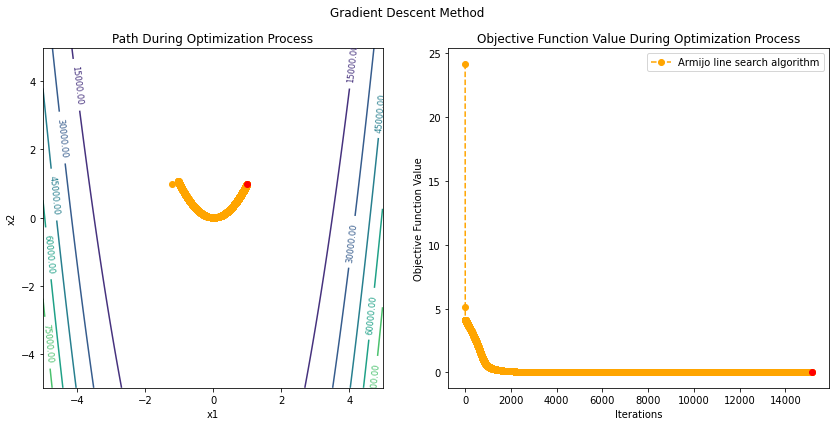

In [57]:
x0 = np.array([-1.2, 1])
xs, ys = GradientDescent(Rosenbrock, Grad_Rosenbrock, init=x0)
plot(xs, ys)

In [40]:
def Newton_Raphson_Optimize(Grad, Hess, x,y, epsilon=1e-3, nMax = 1000):
    #Initialization
    i = 0
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])
    
    #Looping as long as error is greater than epsilon
    while np.linalg.norm(error) > epsilon and i < nMax:
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)   
        print(X) 
        
        X_prev = X
        X = X - np.linalg.inv(Hess(x,y)) @ Grad(x,y)
        error = X - X_prev
        x,y = X[0], X[1]
          
    return X, iter_x,iter_y, iter_count


root,iter_x,iter_y, iter_count = Newton_Raphson_Optimize(Grad_Rosenbrock_f,Hessian_Rosenbrock_f,-1.2,1)

[-1.2  1. ]
[-1.1752809   1.38067416]
[ 0.76311487 -3.17503385]
[0.76342968 0.58282478]
[0.99999531 0.94402732]
[0.9999957  0.99999139]


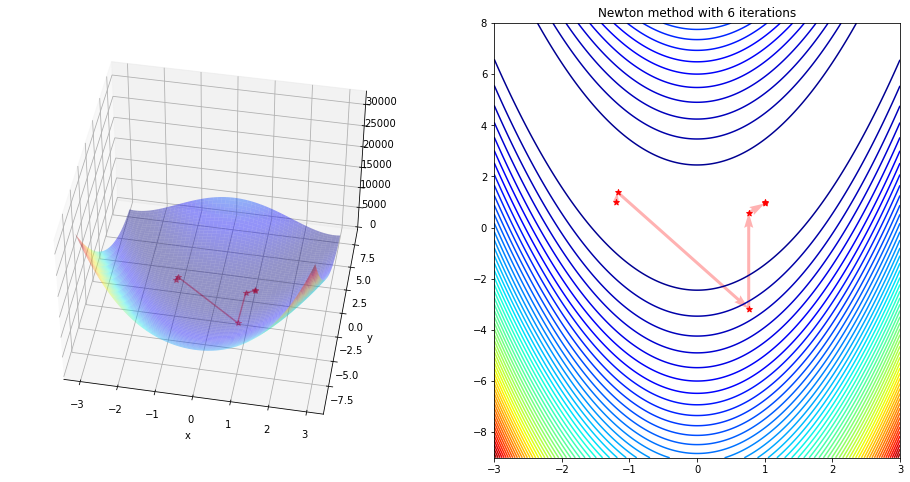

In [41]:
x = np.linspace(-3,3,250)
y = np.linspace(-9,8,350)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock_f(X, Y)

#Angles needed for quiver plot
anglesx = iter_x[1:] - iter_x[:-1]
anglesy = iter_y[1:] - iter_y[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, Rosenbrock_f(iter_x,iter_y),color = 'r', marker = '*', alpha = .4)

#Rotate the initialization to help viewing the graph
ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')

#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 60, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Newton method with {} iterations'.format(len(iter_count)))

plt.show()